In [94]:
import pandas as pd
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.applications import InceptionV3
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam


In [2]:
df = pd.read_csv('list_attribute.txt', delim_whitespace=True, index_col=0)
image_files = os.listdir('images/')
filtered_df = df[df.index.isin(image_files)]
filtered_df

/tmp/ipykernel_4999/2986566526.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv('list_attribute.txt', delim_whitespace=True, index_col=0)


,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
000051.jpg,1,-1,-1,1,1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
000052.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,-1,...,-1,-1,1,-1,-1,-1,-1,-1,-1,-1
000065.jpg,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,...,-1,1,1,-1,-1,-1,-1,-1,-1,1
000166.jpg,1,-1,-1,-1,-1,-1,-1,1,-1,-1,...,1,-1,-1,-1,-1,1,-1,-1,-1,-1
000198.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202320.jpg,-1,1,-1,-1,-1,-1,-1,-1,-1,1,...,-1,1,-1,1,-1,-1,1,-1,-1,1
202340.jpg,-1,-1,1,-1,-1,-1,-1,-1,1,-1,...,-1,1,1,-1,-1,-1,1,-1,-1,1
202347.jpg,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,1,-1,-1,1,-1,-1,1
202357.jpg,-1,-1,1,-1,-1,-1,1,-1,-1,-1,...,-1,-1,1,1,-1,-1,1,1,-1,1


In [9]:
filtered_df.columns

Index(['5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive', 'Bags_Under_Eyes',
       'Bald', 'Bangs', 'Big_Lips', 'Big_Nose', 'Black_Hair', 'Blond_Hair',
       'Blurry', 'Brown_Hair', 'Bushy_Eyebrows', 'Chubby', 'Double_Chin',
       'Eyeglasses', 'Goatee', 'Gray_Hair', 'Heavy_Makeup', 'High_Cheekbones',
       'Male', 'Mouth_Slightly_Open', 'Mustache', 'Narrow_Eyes', 'No_Beard',
       'Oval_Face', 'Pale_Skin', 'Pointy_Nose', 'Receding_Hairline',
       'Rosy_Cheeks', 'Sideburns', 'Smiling', 'Straight_Hair', 'Wavy_Hair',
       'Wearing_Earrings', 'Wearing_Hat', 'Wearing_Lipstick',
       'Wearing_Necklace', 'Wearing_Necktie', 'Young'],
      dtype='object')

In [22]:
filtered_df.reset_index(inplace=True)

In [28]:
compiled_df = filtered_df[['index', 'Male']]
compiled_df

,index,Male
0,000051.jpg,1
1,000052.jpg,1
2,000065.jpg,1
3,000166.jpg,1
4,000198.jpg,-1
...,...,...
4995,202320.jpg,-1
4996,202340.jpg,-1
4997,202347.jpg,-1
4998,202357.jpg,-1


In [40]:
train_files = os.listdir('train/')
validator_files = os.listdir('test/')
train_df = compiled_df[compiled_df['index'].isin(train_files)]
validator_df = compiled_df[compiled_df['index'].isin(validator_files)]

train_df.head()

,index,Male
0,000051.jpg,1
1,000052.jpg,1
2,000065.jpg,1
4,000198.jpg,-1
5,000201.jpg,-1


In [41]:
validator_df.head()

,index,Male
3,000166.jpg,1
8,000352.jpg,1
10,000414.jpg,1
18,000608.jpg,1
22,000798.jpg,1


In [63]:
train_df.loc[:, ('Male')] = train_df['Male'].astype('string')
validator_df.loc[:, ('Male')] = validator_df['Male'].astype('string')

train_df.head(), validator_df.head()

(        index Male
 0  000051.jpg    1
 1  000052.jpg    1
 2  000065.jpg    1
 4  000198.jpg   -1
 5  000201.jpg   -1,
          index Male
 3   000166.jpg    1
 8   000352.jpg    1
 10  000414.jpg    1
 18  000608.jpg    1
 22  000798.jpg    1)

In [96]:
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2, zoom_range=0.2, rotation_range=0.2)

train_generator_df = datagen.flow_from_dataframe(
 dataframe=train_df,
 directory='train/',
 x_col='index',
 y_col='Male',
 subset='training',
 batch_size=32,
 seed=999,
 shuffle=True,
 class_mode='binary',
 target_size=(128, 128)
)

validator_generator_df = datagen.flow_from_dataframe(
 dataframe=validator_df,
 directory='test/',
 x_col='index',
 y_col='Male',
 subset='validation',
 batch_size=32,
 seed=999,
 shuffle=True,
 class_mode='binary',
 target_size=(128, 128)
)

Found 2800 validated image filenames belonging to 2 classes.


Found 300 validated image filenames belonging to 2 classes.


In [97]:
base_model = InceptionV3(include_top=False, input_shape=(128, 128, 3))

In [99]:
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    # Dropout(0.5),
    Dense(1, activation='sigmoid')
])

optimizer = Adam(learning_rate=0.1)  # Adjust learning rate as needed

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
# Train the model
history = model.fit(
 train_generator_df,
 epochs=30,
 validation_data=validator_generator_df
)

Epoch 1/30
88/88 [==============================] - 28s 97ms/step - loss: 1.1596 - accuracy: 0.5839 - val_loss: 0.6931 - val_accuracy: 0.5433
Epoch 2/30
88/88 [==============================] - 8s 85ms/step - loss: 0.6773 - accuracy: 0.5939 - val_loss: 0.6982 - val_accuracy: 0.5433
Epoch 3/30
88/88 [==============================] - 7s 84ms/step - loss: 0.6770 - accuracy: 0.5939 - val_loss: 0.6909 - val_accuracy: 0.5433
Epoch 4/30
88/88 [==============================] - 8s 85ms/step - loss: 0.6768 - accuracy: 0.5939 - val_loss: 0.6902 - val_accuracy: 0.5433
Epoch 5/30
88/88 [==============================] - 7s 84ms/step - loss: 0.6761 - accuracy: 0.5939 - val_loss: 0.6968 - val_accuracy: 0.5433
Epoch 6/30
88/88 [==============================] - 8s 85ms/step - loss: 0.6769 - accuracy: 0.5939 - val_loss: 0.6991 - val_accuracy: 0.5433
Epoch 7/30
88/88 [==============================] - 8s 85ms/step - loss: 0.6769 - accuracy: 0.5939 - val_loss: 0.6945 - val_accuracy: 0.5433
Epoch 8/30
8

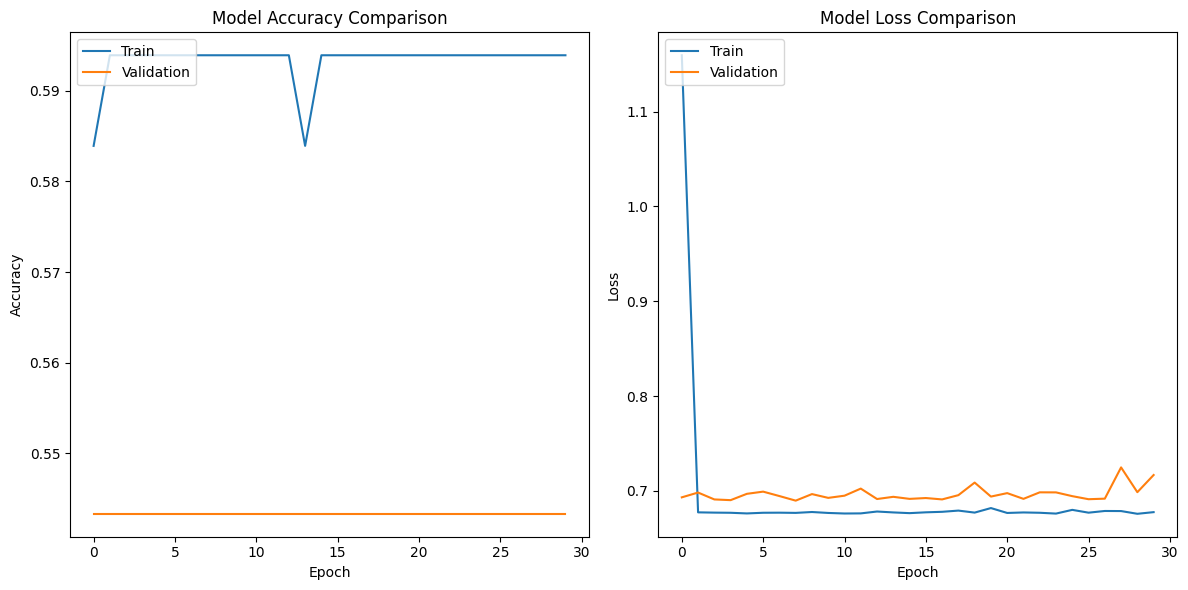

In [100]:
plt.figure(figsize=(12, 6))
# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
# Show plots
plt.tight_layout()
plt.show()

In [102]:
# Evaluate the model on the validation set
evaluation = model.evaluate(validator_generator_df)
# Print the evaluation results
print(f"Validation Loss: {evaluation[0]}")
print(f"Validation Accuracy: {evaluation[1]}")

10/10 [==============================] - 1s 49ms/step - loss: 0.7167 - accuracy: 0.5433
Validation Loss: 0.7166876196861267
Validation Accuracy: 0.5433333516120911


In [103]:
model.save("model_saved/inception-v3-experiment-01.h5")

/home/insomnius/.pyenv/versions/3.11.6/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
